# SciKit Show & Tell Using Ridge to Reef Data
### by Sarah Morrison

"Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn." (Brownlee)

#### In order to show the full usefullness of SciKit, I would need to use a couple other libraries. 
* Pandas: excellent library for working with data in python in Dataframes (tables) and Series (columns)
* Numpy: library for working with numerical values and storing arrays and matrices
* Pyplot: common visualization library

Today I will be showing SciKit's linear regression and nearest neighbor clustering algorithm.

### Importing Data and Setting Up!
We will be identifying the important pieces of the raw data and processing them so SciKit learn can actually compute everything correctly later on. (???)

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('hybrid_yields.csv')

#### Getting dimensions

In [6]:
data.shape

(24, 5)

Great! Now that we got the dimensions of how much data we want to use, we are going to use data.head() to take a look at first 5 rows.

In [7]:
data.head()

,Unnamed: 0,VARIETY,ALTITUDE RANGE (M),yield (kg/ha),days_to_maturity
0,0,H6213,1700-2100,4680.0,175.0
1,1,H6212,1700-2100,4680.0,175.0
2,2,H6210,1700-2100,4500.0,175.0
3,3,H9401,1700-2100,4320.0,175.0
4,4,H629,1700-2400,4320.0,175.0


So, there is an extra column but it can be dropped later. 

We will now be getting the column names.

In [8]:
data.columns

Index(['Unnamed: 0', 'VARIETY', 'ALTITUDE  RANGE (M)', 'yield (kg/ha)',
       'days_to_maturity'],
      dtype='object')

Now we will be exploring the Series, which can also be referred to as column, days_to_maturity using data[  ]

In [9]:
data['days_to_maturity']

0     175.0
1     175.0
2     175.0
3     175.0
4     175.0
5     165.0
6     165.0
7     165.0
8     165.0
9     175.0
10    160.0
11    165.0
12    120.0
13    135.0
14    125.0
15    125.0
16    105.0
17     97.5
18    110.0
19    110.0
20    110.0
21    110.0
22     97.5
23     97.5
Name: days_to_maturity, dtype: float64

Grab a sample data point, which can also be referred to as a row, from the data

In [10]:
data.sample()

,Unnamed: 0,VARIETY,ALTITUDE RANGE (M),yield (kg/ha),days_to_maturity
19,19,DH02,800 – 1200,1350.0,110.0


In [11]:
data['Unnamed: 0']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: Unnamed: 0, dtype: int64

Below we will be dropping the column from our data frame as I said earlier.

In [12]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [13]:
data.head()

,VARIETY,ALTITUDE RANGE (M),yield (kg/ha),days_to_maturity
0,H6213,1700-2100,4680.0,175.0
1,H6212,1700-2100,4680.0,175.0
2,H6210,1700-2100,4500.0,175.0
3,H9401,1700-2100,4320.0,175.0
4,H629,1700-2400,4320.0,175.0


Get all unique values in a series and their absolute count
(what is absolute count)

In [14]:
data['VARIETY'].value_counts()

H6213                 1
H626                  1
H625                  1
Katumani Composite    1
DH01                  1
DH03                  1
H627                  1
H516                  1
PH4                   1
H511                  1
H6212                 1
PH1                   1
H9401                 1
DH04                  1
H628                  1
H515                  1
H6210                 1
H629                  1
H624                  1
H623                  1
H614                  1
DLC1                  1
DH02                  1
H513                  1
Name: VARIETY, dtype: int64

In [15]:
data.columns

Index(['VARIETY', 'ALTITUDE  RANGE (M)', 'yield (kg/ha)', 'days_to_maturity'], dtype='object')

In [16]:
data["ALTITUDE\xa0 RANGE (M)"]

0      1700-2100
1      1700-2100
2      1700-2100
3      1700-2100
4      1700-2400
5      1500-2100
6      1500-2100
7      1500-2100
8      1500-2100
9      1500-2100
10     1000-1800
11     1000-1800
12     1000-1800
13     1000-1800
14     1000-1800
15     1000-1800
16      0 – 1200
17      0 – 1200
18      800-1200
19    800 – 1200
20    800 – 1200
21    800 – 1200
22     1000-1900
23     1000-1900
Name: ALTITUDE  RANGE (M), dtype: object

In [17]:
data['ALTITUDE\xa0 RANGE (M)'].value_counts()

1000-1800     6
1500-2100     5
1700-2100     4
800 – 1200    3
1000-1900     2
0 – 1200      2
1700-2400     1
800-1200      1
Name: ALTITUDE  RANGE (M), dtype: int64

In [18]:
data.columns

Index(['VARIETY', 'ALTITUDE  RANGE (M)', 'yield (kg/ha)', 'days_to_maturity'], dtype='object')

In [19]:
data = data.drop(['VARIETY'], axis = 1)

In [20]:
# dimensions
data.shape

(24, 3)

In [21]:
data.columns

Index(['ALTITUDE  RANGE (M)', 'yield (kg/ha)', 'days_to_maturity'], dtype='object')

##### Extracting features (X) and target variable (y) 
* X is the feature component that we train our model with
* y is the labels (independant variable) that after we have a trained model and crossvalidated it with a set of testing data, our predictivate variable

In [22]:
# dropping the data of yield column... we are predicting upon the yeild factor
X = data.drop(['yield (kg/ha)'], axis = 1).copy()

In [23]:
y = data['yield (kg/ha)'].copy()

# SCIKIT LEARN

In this show and tell, I am using the "VARIETY", "ALTITUDE RANGE", and "days_to_maturity" in order to analyze the yield of crops "yield (kg/ha)"  with SciKit learn's linear regression model and nearest neighbors model. 

In [48]:
# train_test_split splits data arrays into subsets for training data and for testing data
from sklearn.model_selection import train_test_split
# preprocessing changes raw feature vectors into a representation that is more suitable for the downstream estimators
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors

#### Split data into train and test subsets (30%)
With this function, we don't need to divide the dataset manually because train_test_split will make partitions for the two subsets. We are using 30% to verify whether the model gave an accurate predictive output because there is not a lot of data to verify against the training data.
* training data: used to make sure the machine recognizes patterns in the data
* testing data: used to see how well the machine can predict new answers based on its training (validates it)

In [50]:
# resufflng the data into x_train + y_train & x_test + y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
X_train.shape

(16, 2)

In [52]:
y_train.shape

(16,)

In [53]:
X_test.shape

(8, 2)

In [54]:
y_test.shape

(8,)

Label Encoding:

In [55]:
# loading an object from scikit learn called label encoder
le = preprocessing.LabelEncoder()

In [56]:
X_train.head()

,ALTITUDE RANGE (M),days_to_maturity
21,800 – 1200,110.0
5,1500-2100,165.0
2,1700-2100,175.0
12,1000-1800,120.0
15,1000-1800,125.0


#### Transform categorical column into encoded values (a number for each category)
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X


In [58]:
X_train['ALTITUDE\xa0 RANGE (M)'] =  le.fit_transform(X_train['ALTITUDE\xa0 RANGE (M)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Memory usage and computation patterns we can take into account and we could improve upon our memory usage using the suggested coding. This coding works nonetheless so we are continuing on.

In [59]:
X_train.head()

,ALTITUDE RANGE (M),days_to_maturity
21,6,110.0
5,3,165.0
2,4,175.0
12,1,120.0
15,1,125.0


In [76]:
X_test['ALTITUDE\xa0 RANGE (M)'] = le.fit_transform(X_test['ALTITUDE\xa0 RANGE (M)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Again, continuing on.

# Linear Model
Fitting linear regression to our features and target

In [64]:
reg = linear_model.LinearRegression()

In [65]:
reg.fit(X_train, y_train)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

define everything n_jobs etc.

In [67]:
# coefficients of linear regression... where the targeted data is and what features 
reg.coef_ 

array([-14.26939934,  40.1134313 ])

+ The coef_ contain the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately. 
+ https://stackoverflow.com/questions/35386282/what-is-target-in-pythons-sklearn-coef-output

In [68]:
# y intercept of linear regression
reg.intercept_

-2720.718645994434

The reason why intercept_ returns as an array is that we have multiple features (intercepts) and that is why we have multiple biases (intercepts).


In [69]:
# predict values of test subset
predictions = reg.predict(X_test)
print(predictions)

[3869.45872021 1491.19164075 4256.32363389 1634.68119989 3883.72811955
 4270.59303323 2680.32518048 4256.32363389]


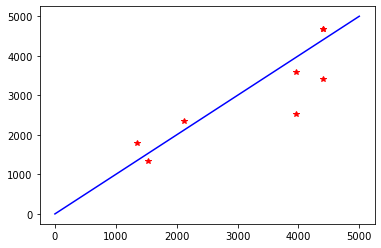

In [77]:
# comparing predicted vs actual
plt.plot(predictions, y_test, 'r*')
plt.plot([0, 5000], [0, 5000], 'b-')

We have predictions on the x axis and y_test on our y axis. This graph shows that there is a pretty accurate model from our training data.

# K Nearest Neighbors
This computes distances between the desired point and all other points, and takes averages of K nearest neighbors to compute predictions.

In [71]:
from sklearn.neighbors import KNeighborsRegressor

Find the closest vector points within the frame it is set to and then decide whether they are in certain vicinities.

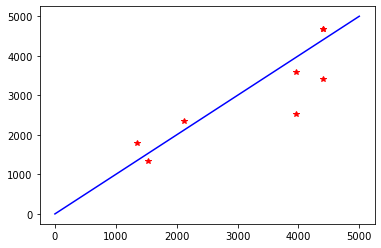

In [72]:
knn = KNeighborsRegressor(n_neighbors=2, algorithm='ball_tree')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
plt.plot(predictions, y_test, 'r*')
plt.plot([0, 5000], [0, 5000], 'b-')

Compute distances between X train and other points

In [73]:
distances, indices = knn.kneighbors(X_test)

In [74]:
print(distances)

[[ 1.          1.        ]
 [ 7.5         7.76208735]
 [ 1.          1.        ]
 [ 2.          2.        ]
 [ 2.          2.        ]
 [ 2.          2.        ]
 [10.         10.        ]
 [ 1.          1.        ]]


Nearest points of each point (by indices)

In [75]:
print(indices)

[[11  1]
 [ 8  7]
 [ 5  2]
 [ 9  0]
 [11  1]
 [ 5  2]
 [13  4]
 [ 5  2]]
